In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize']=[5.0, 5.0]
matplotlib.rcParams['figure.dpi']=100
matplotlib.rcParams['font.size']=14

In [2]:
home='./emulator_profiles/' #point to your profiles
suite='SIMBA' #SIMBA or IllustrisTNG
feedback_type='ASN1' #ASN1, ASN2, AAGN1, AAGN2
profile_type='rho_mean' #rho_mean,rho_med,pth_mean,pth_med - mean or median, density or thermal pressure
interpolation_type='linear' #this is the Rbf interpolation function

In [3]:
def return_emulator (profile_type=profile_type, feedback_type=feedback_type, home='./emulator_profiles/', suite=suite, interpolation_type='linear'): 

    '''
    Inputs:
        profile_type (string): 'rho_mean', 'rho_med', 'pth_mean', 'pth_med'
        feedback_type (string): 'ASN1', 'ASN2', 'AAGN1', 'AAGN2'
        suite (string) : 'SIMBA', 'IllustrisTNG'
        
    Return:
        r (numpy array): radial bins in Mpc 
        emulator
    '''
    
    import scripts.helper_functions as fs

    mass=fs.mass
    mass_str=fs.mass_str
    snap=fs.snap
    redshifts=fs.choose_redshift(suite)
    vary,sims=fs.choose_vary(feedback_type)
    samples=fs.cartesian_prod(vary,redshifts,mass) 
    nsamp=samples.shape[0]

    samples,r,y,emulator=fs.build_emulator_3D(home,suite,feedback_type,profile_type,interpolation_type)

    return r, emulator

def emulated_profile(emulator, A, z, logM):
    
    '''
    Inputs:
        emulator 
        A: feedback strength (float)
        z: redshift (float)
        logM: halo mass in log10 Msun
    Return:
        r: radial bins in Mpc (numpy array)
        profile : (numpy array)
    '''
    
    params=[[A, z, logM]] #the order here is important- A, then z, then logM
    profile = emulator(params)
    
    return profile

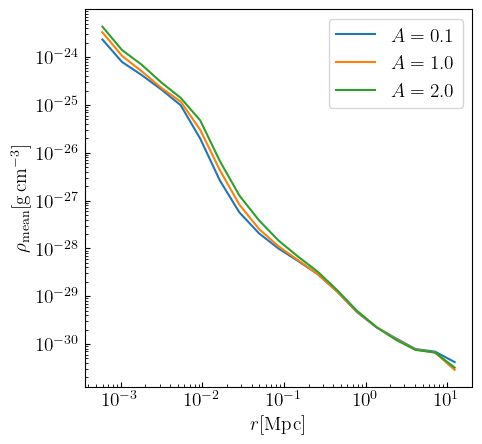

In [4]:
r, density_emulator_ASN1 = return_emulator(feedback_type='ASN1', profile_type='rho_mean') 

z = 0.1
logM = 13.0

for A in [0.1, 1.0, 2.0] :
    prof = emulated_profile(density_emulator_ASN1, A, z, logM ) 
    plt.loglog(r,10**prof, label=r'$A='+str(A)+'$')
    plt.xlabel(r'$r [{\rm Mpc}]$')
    plt.ylabel(r'$\rho_{\rm mean} [{\rm g\, cm^{-3}}]$')
    plt.legend()